In [29]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Загрузка данных

In [2]:
data = pd.read_excel('/content/Date_Fruit_Datasets.xlsx')
data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [17]:
data['Class'].unique()

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

In [18]:
class_name = {0:'BERHI', 1:'DEGLET', 2:'DOKOL', 3:'IRAQI', 4:'ROTANA', 5:'SAFAVI', 6:'SOGAY'}

In [5]:
train, test = train_test_split(data, test_size=0.2)

In [20]:
train

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
730,298760,2184.9109,842.4735,453.8198,0.8425,616.7601,0.9871,302671,0.8112,1.8564,...,11.8010,10.4741,4.0698,-7861085184,-10529727488,-17813413888,26.3517,30.3071,39.6009,SAFAVI
21,342155,2151.8960,760.6585,575.3604,0.6541,660.0343,0.9904,345474,0.7727,1.3221,...,2.9202,3.7653,11.1414,-39405760512,-38763913216,-19608967168,52.8384,53.1181,37.9925,BERHI
116,190722,1769.6710,664.2511,418.4305,0.7767,492.7827,0.8928,213622,0.6364,1.5875,...,2.3342,1.9726,2.5195,-40318013440,-39088558080,-30143860736,69.6395,68.9651,61.5369,DEGLET
58,384232,2263.4819,787.2324,624.8104,0.6083,699.4422,0.9914,387562,0.7505,1.2600,...,3.3659,6.1402,9.3571,-44874883072,-40287244288,-29479108608,53.5858,51.9051,44.1969,BERHI
396,411708,2318.3440,805.4811,652.9468,0.5856,724.0186,0.9965,413165,0.7867,1.2336,...,14.6318,13.6942,10.2999,-21918187520,-21830563840,-22435819520,37.0776,36.7169,36.3352,IRAQI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,265688,2372.8040,888.2209,387.3163,0.8999,581.6223,0.9603,276661,0.5237,2.2933,...,8.0099,8.3246,3.5337,-7096707584,-10391261184,-14098856960,25.3831,31.0941,37.0967,SAFAVI
546,389064,2342.3311,826.6586,603.5352,0.6834,703.8265,0.9913,392486,0.7232,1.3697,...,3.8873,3.5838,3.4938,-88341217280,-74342629376,-66415575040,73.7252,68.5933,65.2494,ROTANA
625,343471,2252.6140,836.8517,533.9788,0.7700,661.3024,0.9752,352200,0.6598,1.5672,...,5.3466,15.8872,4.9999,-4714169344,-7956724736,-11758208000,19.4499,24.0934,30.0921,SAFAVI
208,138061,1397.4399,533.3875,330.7272,0.7846,419.2669,0.9927,139081,0.8196,1.6128,...,2.8761,3.4091,2.8337,-11680705536,-10830333952,-13359763456,46.1121,44.6619,49.2393,DOKOL


In [21]:
test

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
794,335351,2445.8889,976.2505,441.5720,0.8919,653.4387,0.9622,348539,0.5593,2.2109,...,3.6734,6.4479,3.0186,-14347371520,-15024765952,-21827350528,32.7489,33.7295,40.6244,SAFAVI
638,260563,1975.3740,762.5055,437.8510,0.8187,575.9854,0.9871,263977,0.6648,1.7415,...,7.7778,16.2644,3.6606,-2424508160,-4791147520,-8197618688,16.2304,22.3860,28.8860,SAFAVI
647,266271,1979.9100,765.7112,444.7476,0.8140,582.2601,0.9917,268512,0.6540,1.7217,...,4.4464,14.1668,3.1325,-2989908224,-5908135936,-10182017024,17.8575,24.3544,31.7812,SAFAVI
834,285626,2061.6350,785.1763,465.2850,0.8055,603.0508,0.9875,289254,0.6949,1.6875,...,2.2405,2.3746,2.7014,-31685144576,-25452177408,-22856843264,51.0965,46.1440,44.0274,SOGAY
482,401353,2489.5581,884.2215,593.9569,0.7408,714.8556,0.9381,427855,0.7474,1.4887,...,3.1769,3.2216,2.6855,-93204955136,-84547674112,-62062325760,73.5749,70.3907,60.7683,ROTANA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,390961,2480.5339,991.6502,505.0957,0.8606,705.5402,0.9847,397037,0.6254,1.9633,...,10.4281,9.1581,4.6065,-13213769728,-14342359040,-18672896000,28.5434,30.5893,35.8131,SAFAVI
239,149806,1435.4399,526.9439,362.1404,0.7264,436.7367,0.9940,150711,0.7497,1.4551,...,2.7327,3.4920,3.1570,-11310804992,-10350289920,-11004194816,43.2231,42.0917,43.2564,DOKOL
486,375310,2402.4060,802.1452,604.5172,0.6573,691.2739,0.9686,387472,0.7207,1.3269,...,2.9623,2.6091,3.0813,-78107303936,-64833978368,-55521071104,70.2021,64.3426,60.1188,ROTANA
793,326893,2297.4441,889.0150,473.2075,0.8466,645.1458,0.9709,336684,0.6225,1.8787,...,9.8454,7.9471,3.4074,-11727537152,-12416028672,-15897613312,28.1033,30.5241,35.7393,SAFAVI


Разделение датасета

In [12]:
x_train = train.iloc[:,0:34]
x_train

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
730,298760,2184.9109,842.4735,453.8198,0.8425,616.7601,0.9871,302671,0.8112,1.8564,...,0.4790,11.8010,10.4741,4.0698,-7861085184,-10529727488,-17813413888,26.3517,30.3071,39.6009
21,342155,2151.8960,760.6585,575.3604,0.6541,660.0343,0.9904,345474,0.7727,1.3221,...,1.9556,2.9202,3.7653,11.1414,-39405760512,-38763913216,-19608967168,52.8384,53.1181,37.9925
116,190722,1769.6710,664.2511,418.4305,0.7767,492.7827,0.8928,213622,0.6364,1.5875,...,-0.4803,2.3342,1.9726,2.5195,-40318013440,-39088558080,-30143860736,69.6395,68.9651,61.5369
58,384232,2263.4819,787.2324,624.8104,0.6083,699.4422,0.9914,387562,0.7505,1.2600,...,1.7260,3.3659,6.1402,9.3571,-44874883072,-40287244288,-29479108608,53.5858,51.9051,44.1969
396,411708,2318.3440,805.4811,652.9468,0.5856,724.0186,0.9965,413165,0.7867,1.2336,...,1.8670,14.6318,13.6942,10.2999,-21918187520,-21830563840,-22435819520,37.0776,36.7169,36.3352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,265688,2372.8040,888.2209,387.3163,0.8999,581.6223,0.9603,276661,0.5237,2.2933,...,0.5253,8.0099,8.3246,3.5337,-7096707584,-10391261184,-14098856960,25.3831,31.0941,37.0967
546,389064,2342.3311,826.6586,603.5352,0.6834,703.8265,0.9913,392486,0.7232,1.3697,...,-0.0400,3.8873,3.5838,3.4938,-88341217280,-74342629376,-66415575040,73.7252,68.5933,65.2494
625,343471,2252.6140,836.8517,533.9788,0.7700,661.3024,0.9752,352200,0.6598,1.5672,...,0.9172,5.3466,15.8872,4.9999,-4714169344,-7956724736,-11758208000,19.4499,24.0934,30.0921
208,138061,1397.4399,533.3875,330.7272,0.7846,419.2669,0.9927,139081,0.8196,1.6128,...,0.2499,2.8761,3.4091,2.8337,-11680705536,-10830333952,-13359763456,46.1121,44.6619,49.2393


In [14]:
y_train = train.iloc[:,34]
y_train

730    SAFAVI
21      BERHI
116    DEGLET
58      BERHI
396     IRAQI
        ...  
671    SAFAVI
546    ROTANA
625    SAFAVI
208     DOKOL
55      BERHI
Name: Class, Length: 718, dtype: object

In [19]:
x_test = test.iloc[:, 0:34]
x_test

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
794,335351,2445.8889,976.2505,441.5720,0.8919,653.4387,0.9622,348539,0.5593,2.2109,...,-0.0893,3.6734,6.4479,3.0186,-14347371520,-15024765952,-21827350528,32.7489,33.7295,40.6244
638,260563,1975.3740,762.5055,437.8510,0.8187,575.9854,0.9871,263977,0.6648,1.7415,...,0.3581,7.7778,16.2644,3.6606,-2424508160,-4791147520,-8197618688,16.2304,22.3860,28.8860
647,266271,1979.9100,765.7112,444.7476,0.8140,582.2601,0.9917,268512,0.6540,1.7217,...,0.2226,4.4464,14.1668,3.1325,-2989908224,-5908135936,-10182017024,17.8575,24.3544,31.7812
834,285626,2061.6350,785.1763,465.2850,0.8055,603.0508,0.9875,289254,0.6949,1.6875,...,0.5851,2.2405,2.3746,2.7014,-31685144576,-25452177408,-22856843264,51.0965,46.1440,44.0274
482,401353,2489.5581,884.2215,593.9569,0.7408,714.8556,0.9381,427855,0.7474,1.4887,...,-0.2682,3.1769,3.2216,2.6855,-93204955136,-84547674112,-62062325760,73.5749,70.3907,60.7683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,390961,2480.5339,991.6502,505.0957,0.8606,705.5402,0.9847,397037,0.6254,1.9633,...,0.3582,10.4281,9.1581,4.6065,-13213769728,-14342359040,-18672896000,28.5434,30.5893,35.8131
239,149806,1435.4399,526.9439,362.1404,0.7264,436.7367,0.9940,150711,0.7497,1.4551,...,0.3548,2.7327,3.4920,3.1570,-11310804992,-10350289920,-11004194816,43.2231,42.0917,43.2564
486,375310,2402.4060,802.1452,604.5172,0.6573,691.2739,0.9686,387472,0.7207,1.3269,...,-0.3764,2.9623,2.6091,3.0813,-78107303936,-64833978368,-55521071104,70.2021,64.3426,60.1188
793,326893,2297.4441,889.0150,473.2075,0.8466,645.1458,0.9709,336684,0.6225,1.8787,...,0.2673,9.8454,7.9471,3.4074,-11727537152,-12416028672,-15897613312,28.1033,30.5241,35.7393


In [22]:
y_test = test.iloc[:,34]
y_test

794    SAFAVI
638    SAFAVI
647    SAFAVI
834     SOGAY
482    ROTANA
        ...  
670    SAFAVI
239     DOKOL
486    ROTANA
793    SAFAVI
359     DOKOL
Name: Class, Length: 180, dtype: object

Нормализация

In [25]:
standart_scaler = StandardScaler()
x_train = standart_scaler.fit_transform(x_train)
x_test = standart_scaler.fit_transform(x_test)

In [26]:
x_train[0]

array([ 1.51450387e-02,  3.22865813e-01,  6.45674596e-01, -3.57065649e-01,
        1.19450180e+00,  1.13336204e-01,  2.82328663e-01,  1.08677091e-03,
        1.37028919e+00, -2.11440525e-02, -1.01647853e+00, -1.19458444e+00,
       -3.52115762e-02, -6.95568605e-01, -1.27314168e+00,  3.07977775e-01,
       -1.53225647e+00, -1.34729683e+00, -8.23877520e-01, -1.50037142e+00,
       -9.76839835e-01, -1.23082000e+00,  1.94675516e+00,  1.55131064e+00,
        3.88855467e-01,  2.75930939e+00,  1.48134498e+00,  1.60813474e-01,
        1.18643825e+00,  1.08316228e+00,  6.72032454e-01, -1.53210988e+00,
       -1.34713578e+00, -8.23695876e-01])

In [27]:
x_test[0]

array([ 0.31711787,  0.92303243,  1.57379436, -0.52693943,  1.70323834,
        0.37715184, -0.9114134 ,  0.38239748, -3.01009025,  3.03737363,
       -2.1655492 , -2.3739462 ,  0.25986069, -1.15014891, -2.19927841,
        0.10255321, -0.91174396, -0.94043162, -0.56195579, -0.6987447 ,
       -0.5410278 , -0.31245377,  0.09120764,  0.38812995, -0.59997053,
       -0.31482199,  0.23458744, -0.47742933,  0.8136393 ,  0.79274667,
        0.35904662, -0.91196836, -0.94082471, -0.56243375])

In [30]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [32]:
print(y_train[0])
print(class_name[y_train[0]])

5
SAFAVI


In [33]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [34]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0.], dtype=float32)

Создание модели

In [103]:
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(7, activation='softmax'))

In [104]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

Обучение модели

In [105]:
history = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_split=0.1)

Epoch 1/15
21/21 [==============================] - 1s 10ms/step - loss: 2.0102 - accuracy: 0.1192 - val_loss: 1.7627 - val_accuracy: 0.3056
Epoch 2/15
21/21 [==============================] - 0s 3ms/step - loss: 1.5275 - accuracy: 0.4118 - val_loss: 1.4385 - val_accuracy: 0.5417
Epoch 3/15
21/21 [==============================] - 0s 3ms/step - loss: 1.2381 - accuracy: 0.6285 - val_loss: 1.2287 - val_accuracy: 0.5972
Epoch 4/15
21/21 [==============================] - 0s 3ms/step - loss: 1.0446 - accuracy: 0.7198 - val_loss: 1.0739 - val_accuracy: 0.6528
Epoch 5/15
21/21 [==============================] - 0s 3ms/step - loss: 0.9073 - accuracy: 0.7384 - val_loss: 0.9575 - val_accuracy: 0.6667
Epoch 6/15
21/21 [==============================] - 0s 3ms/step - loss: 0.8029 - accuracy: 0.7508 - val_loss: 0.8712 - val_accuracy: 0.6806
Epoch 7/15
21/21 [==============================] - 0s 3ms/step - loss: 0.7291 - accuracy: 0.7678 - val_loss: 0.8073 - val_accuracy: 0.7361
Epoch 8/15
21/21 [=

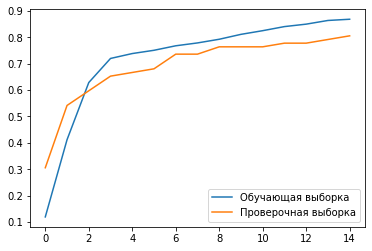

In [106]:
plt.plot(history.history['accuracy'], label='Обучающая выборка')
plt.plot(history.history['val_accuracy'], label='Проверочная выборка')
plt.legend()
plt.show()

In [107]:
scores = model.evaluate(x_test, y_test)
print(round(scores[1]*100, 4))

6/6 [==============================] - 0s 3ms/step - loss: 0.4287 - accuracy: 0.8722
87.2222


In [114]:
print(x_test[0].shape)
print(x_train[0].shape)

(34,)
(34,)


In [136]:
n = 0
pred = model.predict(x_test)
print(np.argmax(pred[n]))
print(class_name[np.argmax(pred[n])])
print(np.argmax(y_train[n]))
print(class_name[np.argmax(y_train[n])])

5
SAFAVI
5
SAFAVI


Построение модели с помощью Keras Tuner

In [138]:
!pip install -U keras-tuner
from keras_tuner.tuners import RandomSearch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.2 MB/s 
     |████████████████████████████████| 1.6 MB 41.0 MB/s 


In [139]:
def build_model(hp):
  model_tuner = Sequential()
  activation_choice = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh'])
  model_tuner.add(Dense(units=hp.Int('units_input',
                               min_value=10,
                               max_value=120,
                               step=10),
                  input_dim=x_train.shape[1],
                  activation=activation_choice))
  for i in range(hp.Int('num_layers', 0,2)):
    model_tuner.add(Dense(units=hp.Int('units_'+str(i),
                                 min_value=10,
                                 max_value=150,
                                 step=10),
                    activation=activation_choice))
  model_tuner.add(Dense(7, activation='softmax'))

  model_tuner.compile(
      optimizer=hp.Choice('optimizer', values=['Adam', 'rmsprop']),
      loss='categorical_crossentropy',
      metrics=['accuracy'])
  
  return model_tuner

In [140]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=300,
    directory='directory'
)

In [141]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh'], 'ordered': False}
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 120, 'step': 10, 'sampling': None}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 0, 'max_value': 2, 'step': 1, 'sampling': None}
optimizer (Choice)
{'default': 'Adam', 'conditions': [], 'values': ['Adam', 'rmsprop'], 'ordered': False}


In [142]:
tuner.search(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_split=0.1)

Trial 300 Complete [00h 00m 02s]
val_accuracy: 0.6805555820465088

Best val_accuracy So Far: 0.9305555820465088
Total elapsed time: 00h 10m 35s


In [143]:
models = tuner.get_best_models(num_models=5)
for m in models:
  m.summary()
  m.evaluate(x_test, y_test)
  print()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                2100      
                                                                 
 dense_1 (Dense)             (None, 80)                4880      
                                                                 
 dense_2 (Dense)             (None, 7)                 567       
                                                                 
Total params: 7,547
Trainable params: 7,547
Non-trainable params: 0
_________________________________________________________________
6/6 [==============================] - 0s 4ms/step - loss: 0.3018 - accuracy: 0.8889

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 90)                3150      
              

In [158]:
tuner.get_best_hyperparameters(1)[0].values

{'activation': 'tanh',
 'units_input': 60,
 'num_layers': 1,
 'optimizer': 'rmsprop',
 'units_0': 80,
 'units_1': 100}

In [155]:
model_tuner = tuner.get_best_models(1)[0]

In [156]:
scores = model_tuner.evaluate(x_test, y_test)
print(round(scores[1]*100,4))

6/6 [==============================] - 0s 2ms/step - loss: 0.3018 - accuracy: 0.8889
88.8889
